# Réalisé par : Hiba Jabilou et Mohammed Taha Benomar



# Travaux Pratiques Intelligence Artificielle: Lab1

Python 4 Data Science: Introduction à NumPy et Pandas 🤖 🙌.

## Objectifs du TP:

> **Se familiariser avec les instructions NumPy**

> **Se familiariser avec les commandes les plus utilisées pour l'exploration des données en utilisant la libraire Pandas**

> **Analyser les données pour pouvoir répondre à la question: Qu'est ce qui fait un Hit?** Pour ce faire, nous allons analyser les pistes musicales dont les données sont extraites de Spotify API. 



<br> A la fin du TP vous devez **rendre ce notebook dans "Assignment" de Teams**. Le TP doit être travaillé en préférence en binôme.

_Besoin d'aide? Laisser moi un Commentaire sur Teams_

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Exercices Numpy

### I. Warm-up Exercice

Ce petit exercice a pour objectif de vous familiariser avec les matrices multi-dimensionnelles NumPy.

<img src="resources/array.png" width=420>

1. Créer la matrice dépictée dans la figure

In [1]:
# import numpy

import numpy as np


In [2]:
# Créer la matrice
matrice= np.arange(1,50).reshape((7,7))
matrice

array([[ 1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19, 20, 21],
       [22, 23, 24, 25, 26, 27, 28],
       [29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42],
       [43, 44, 45, 46, 47, 48, 49]])

In [3]:
# explorer la matrice 
print(matrice)

[[ 1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14]
 [15 16 17 18 19 20 21]
 [22 23 24 25 26 27 28]
 [29 30 31 32 33 34 35]
 [36 37 38 39 40 41 42]
 [43 44 45 46 47 48 49]]


2.  Ecrire les instructions pour sélectionner les éléments en rouge, bleu et jaune.

In [4]:
# selectionner les éléments jaunes

print(matrice[4])

[29 30 31 32 33 34 35]


In [5]:
# selectionner les éléments rouges

print(matrice[:,1])
print(matrice[:,3])

[ 2  9 16 23 30 37 44]
[ 4 11 18 25 32 39 46]


In [6]:
# selectionner les éléments bleus

print(matrice[1,0])
print(matrice[3,0])
print(matrice[1,2])
print(matrice[3,2])

8
22
10
24


<br>

### II. Manipulation d'une image avec NumPy

L'objectif de cet exercice est de démontrer l'intérêt de NumPy, particulièrement pour la manipulation des images. Une image peut être considérée comme une matrice et peut donc facilement subir les transformations NumPy. 

On voudrait, dans cet exercice, lire une image, puis essayer de la brouiller (la rendre floue). Pour cela, on va essayer d'affecter à chaque pixel la moyenne de ses pixels voisins. 

Il est possible bien évidemment de faire la chose en bouclant sur les éléments de la matrice (double boucle). Mais on s'intéresse à le faire d'une manière optimisée en utilisant NumPy.

Essayons d'appliquer l'algorithme sur une petite matrice (il faut dire que ce n'est pas un algorithme state of the art, mais il fait l'affaire). Prenons une image de 4x4 pixels. L'idée est de la réduire en une image à 4 pixels comme c'est illustré dans la figure suivante:

<img src="resources/flou1.png">

In [7]:
matrice = np.arange(1,17).reshape((4,4))

In [8]:
matrice

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [9]:
matrice.shape

(4, 4)

<br> Calculer la moyenne des pixels voisins de chaque pixel flaggé dans notre image source revient à calculer la moyenne des matrices suivantes: 

<img src="resources/flou2.png">

<br> Selectionner le centre de cette matrice (jaune). Utilier les indexes relatifs pour que votre code soit généralisable pour n'importe quelle taille de matrice.

In [10]:
centre=matrice[1:-1,1:-1]
centre

array([[ 6,  7],
       [10, 11]])

<br> Selectionner le haut de cette matrice (violet):

In [11]:
c=centre.shape[0]

haut=matrice[0:c,1:-1]

haut

array([[2, 3],
       [6, 7]])

<br> Selectionner le bas de cette matrice (Rouge):

In [12]:
bas=matrice[-c:,1:-1]

bas

array([[10, 11],
       [14, 15]])

<br> Selectionner la partie gauche de cette matrice (bleu):

In [13]:
a=centre.shape[1]

gauche=matrice[1:c+1,:a]
gauche

array([[ 5,  6],
       [ 9, 10]])

<br> Selectionner la partie droite de cette matrice (vert):

In [14]:
droite=matrice[1:c+1,-a:]

droite

array([[ 7,  8],
       [11, 12]])

<br> Calculer la matrice des moyennes (element-wise):

In [15]:
(centre+droite+haut+bas+gauche)/5

array([[ 6.,  7.],
       [10., 11.]])

<br> Cette matrice présente l'image brouillée de l'image source.

<br> Maintenant on va généraliser cela sur une image quelconque, en définissant une fonction:

In [16]:
def brouiller(image):
    '''
    Arg: Image source
    Retourne l'image brouillée 
    '''
    
    
    # Appliquer l'algorithme sur l'image

    centre=image[1:-1,1:-1]

    c=centre.shape[0]
    a=centre.shape[1]

    gauche=image[1:c+1,:a]
    droite=image[1:c+1,-a:]
    bas=image[-c:,1:-1]
    haut=image[0:c,1:-1]
    
    image_brouillee=(centre+droite+haut+bas+gauche)/5
    
    return image_brouillee

<br> Pour tester notre fonction, nous allons essayer de brouiller l'image "Metro". On utilisera Matplotlib pour ouvrir le fichier image.

In [17]:
import matplotlib.pyplot as plt

In [18]:
image = plt.imread('resources/Metro.png')

In [19]:
image

array([[0.6039216 , 0.6431373 , 0.6784314 , ..., 0.59607846, 0.5921569 ,
        0.63529414],
       [0.6666667 , 0.654902  , 0.654902  , ..., 0.654902  , 0.64705884,
        0.6392157 ],
       [0.68235296, 0.6784314 , 0.6666667 , ..., 0.61960787, 0.57254905,
        0.5764706 ],
       ...,
       [0.14509805, 0.15294118, 0.16078432, ..., 0.1254902 , 0.1254902 ,
        0.1254902 ],
       [0.14117648, 0.15686275, 0.16470589, ..., 0.12156863, 0.1254902 ,
        0.12156863],
       [0.14117648, 0.15294118, 0.16470589, ..., 0.12156863, 0.1254902 ,
        0.12156863]], dtype=float32)

In [20]:
type(image), image.dtype, image.shape

(numpy.ndarray, dtype('float32'), (461, 615))

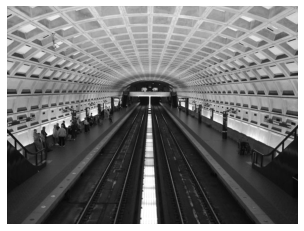

In [21]:
# Ouvrir l'image en gris

plt.imshow(image)
plt.gray()
plt.axis('off')
plt.show()

In [22]:
image_brouillee = brouiller(image)

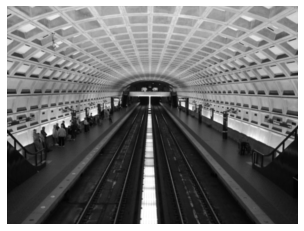

In [23]:
# Afficher la nouvelle image
plt.imshow(image_brouillee)
plt.gray()
plt.axis('off')
plt.show()

<br> Comme on n'a appliqué le filtre qu'une seule fois, les différences sont difficiles à discerner. Mais si vous affichez la différence entre les deux images, vous verrez quelques changements.

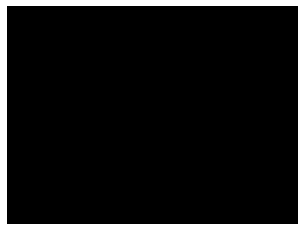

In [24]:
plt.imshow(image - image)
plt.axis('off')
plt.show()

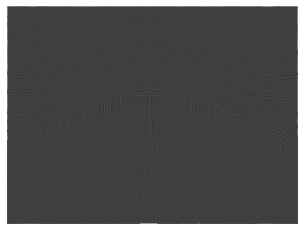

In [25]:
# Afficher la différence entre l'image source et l'image brouillée
padded_image=np.pad(image_brouillee,[(1,1),(1,1)],mode='constant', constant_values=0)
plt.imshow(image - padded_image)
plt.axis('off')
plt.show()


<br> Afin d'effectivement brouiller l'image, vous pouvez réappliquer le filtre une 50aine de fois: 

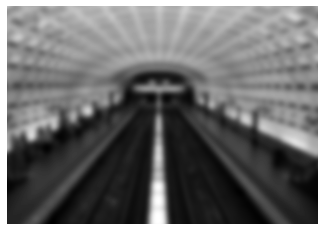

In [26]:
# Boucler et appliquer le filtre, puis afficher l'image résultante

for i in range(50):
    image=brouiller(image)
    
# Afficher l'image brouillée
plt.imshow(image)
plt.gray()
plt.axis('off')
plt.show()    

<br>

### Explorer d'autres possibilités: 

Vous pouvez explorer d'autres manipulations des images avec Numpy (incluant les données RGB): https://note.nkmk.me/en/python-numpy-image-processing/

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


## Introduction à Pandas

## A. Importer et examiner les données

Pandas est très fort dans la lecture et le traitement des données structurées. Pour notre analyse, nous aurons besoins de lire les fichiers csv pour pouvoir les explorer. Nos données sont issues de Spotify et englobent plus de 160.000 pistes musicales extraites à partir de Spotify Web API. Ces informations sont également groupées par artiste, année, et genre musical. 

Le dossier music_dataset contient donc 5 fichiers csv:
- data_by_artist
- data_by_genres
- data_by_year
- data_w_genres
- data

Avant d'attaquer les données dans plus de détails, il est très judicieux de commencer par une exploration rapide. Ceci vous permettra de répondre aux questions: A quelles données ai-je affaire? Quelle est la qualité de ces données là?.... 

Les données sont extraites en utilisant l'API de Spotify. Pour plus de détails sur les métadata, vous pouvez explorer: https://developer.spotify.com/documentation/web-api/reference/

#### 1. Importer les données

Commencer par importer pandas en respectant la convention d'import.

In [1]:
import pandas as pd

<br> Lire le fichier csv 'data.csv' relatif aux données des pistes dans une dataframe.

In [4]:
df=pd.read_csv("music_dataset/data.csv")

<br> Afficher les premières lignes de la dataframe créée.

In [6]:
df.head(20)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.19500,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.01350,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.22000,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.13000,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.20400,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
5,0.995,"['Felix Mendelssohn', 'Vladimir Horowitz']",0.424,352600,0.12000,0,6NxAf7M8DNHOBTmEd3JSO5,0.911000,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,1928,0.0593,63.521,0.2660,1928
6,0.956,"['Franz Liszt', 'Vladimir Horowitz']",0.444,136627,0.19700,0,6O0puPuyrxPjDTHDUgsWI7,0.435000,11,0.0744,-17.226,1,"Valse oubliée No. 1 in F-Sharp Major, S. 215/1",0,1928,0.0400,80.495,0.3050,1928
7,0.988,['Carl Woitschach'],0.555,153967,0.42100,0,6OJjveoYwJdIt76y0Pxpxw,0.836000,1,0.1050,-9.878,1,Per aspera ad astra,0,1928,0.0474,123.310,0.8570,1928
8,0.995,"['Francisco Canaro', 'Charlo']",0.683,162493,0.20700,0,6OaJ8Bh7lsBeYoBmwmo2nh,0.206000,9,0.3370,-9.801,0,Moneda Corriente - Remasterizado,0,1928-10-03,0.1270,119.833,0.4930,1928
9,0.846,['Seweryn Goszczyński'],0.674,111600,0.20500,0,6PrZexNb16cabXR8Q418Xc,0.000000,9,0.1700,-20.119,1,Chapter 1.3 - Zamek kaniowski,0,1928,0.9540,81.249,0.7590,1928


<br> Afficher la taille et la forme de votre dataframe. 

In [7]:
df.size # taille de la dataframe

3228271

In [9]:
df.shape

(169909, 19)

<br></br>
#### 2. Examiner vos données:

<br> Dresser une liste des colonnes avec une description de leurs types, valeurs possibles (intervales si numérique)... Penser à utiliser les différentes fonctions Pandas disponibles. 

In [12]:
liste=df.columns.tolist()
liste

['acousticness',
 'artists',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'id',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'name',
 'popularity',
 'release_date',
 'speechiness',
 'tempo',
 'valence',
 'year']

In [13]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [30]:
minimum = df['acousticness'].min()
maximum = df['acousticness'].max()
print("Les valeurs prises dans la colonne acousticness sont entre : ", minimum , "et", maximum)

minimum = df['danceability'].min()
maximum = df['danceability'].max()
print("Les valeurs prises dans la colonne danceability sont entre : ", minimum , "et", maximum)

minimum = df['duration_ms'].min()
maximum = df['duration_ms'].max()
print("Les valeurs prises dans la colonne duration_ms sont entre : ", minimum , "et", maximum)

minimum = df['energy'].min()
maximum = df['energy'].max()
print("Les valeurs prises dans la colonne energy sont entre : ", minimum , "et", maximum)



Les valeurs prises dans la colonne acousticness sont entre :  0.0 et 0.996
Les valeurs prises dans la colonne danceability sont entre :  0.0 et 0.988
Les valeurs prises dans la colonne duration_ms sont entre :  5108 et 5403500
Les valeurs prises dans la colonne energy sont entre :  0.0 et 1.0


<br></br>
#### 2. Modifier vos données:

<br> Changer le type de la colonne popularité en un int.

In [31]:
df.astype({'popularity': 'int'}).dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int32
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

<br> Spécifier que l'index de la Dataframe est le nom de la piste. Puis revenez à l'index d'origine.

In [45]:
df.set_index('name')


KeyError: "None of ['name'] are in the columns"

In [44]:
df.reset_index('name')


,name,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
0,Singende Bataillone 1. Teil,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,0,1928,0.0506,118.469,0.7790,1928
1,"Fantasiestücke, Op. 111: Più tosto lento",0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,0,1928,0.0462,83.972,0.0767,1928
2,Chapter 1.18 - Zamek kaniowski,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,0,1928,0.9290,107.177,0.8800,1928
3,Bebamos Juntos - Instrumental (Remasterizado),0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,0,1928-09-25,0.0926,108.003,0.7200,1928
4,"Polonaise-Fantaisie in A-Flat Major, Op. 61",0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,Skechers (feat. Tyga) - Remix,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,Sweeter (feat. Terrace Martin),0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,64,2020-06-08,0.0403,128.000,0.2700,2020
169906,How Would I Know,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,I Found You,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,70,2020-02-28,0.0385,129.916,0.4720,2020


<br> Supprimer la colonne id faisant référence aux ID des pistes dans Spotify API. Vérifier que la colonne a été supprimée en listant les colonnes.

<br> Supprimer la première ligne de notre DataFrame. 

<br></br>
Maintenant que nous avons une idée sur les données de notre Dataset on peut **penser à des questions à poser. Lister un maximum de questions.** On peut revenir enrichir cette liste au fur et à mesure qu'on explore nos données.
- Quelle est la popularité des pistes selon les années?
- Quels sont les artistes dont les chansons sont unilatéralement bien reçues?
- Quels sont les genres les plus populaires?
- Y-a-t-il des correlations entre les caractéristiques d'une piste et sa popularité?
- ...

<br></br>
## B. Traiter vos données

Pandas fournit une panoplie de fonctions permettant de selectionner, filtrer, ordonner... vos données. On va les utiliser pour mieux comprendre nos données.

### 1. Selectionner les données:

1. Afficher les pistes publiée l'année de votre naissance.

2. Stocker le résultat dans une nouvelle Dataframe. Combien de pistes y'en a-t-il?

3. Afficher la colonne 'year' dans la nouvelle Dataframe et vérifier que seule l'année de votre naissance est incluse.

4. N'afficher que les informations relatives à l'artiste, le nom de la piste, et sa popularité.

<br>

### 2. Filter les données

Revenir à la Dataframe d'origine.

1. N'afficher que les chansons les plus populaires. Vous pouvez choisir un seuil de popularité en fonction de vos données. Voir rapidement la distribution de la popularité en utilisant la fonction hist() de Pandas.

2. Afficher les chansons dont l'energie est proche de 1 et la clé est 6.


3. N'affichez que les pistes qui n'ont pas de paroles explicites et qui ont une grande popularité (dont le seuil est à vous de définir).

4. Afficher les pistes dont la popularité est >95 ou la date de publication est antérieure au 01/Juin de cette année. 

5. Afficher les pistes de votre artiste préféré. Vous pouvez utiliser les fonction str. pour chercher les lignes qui contiennent un bout du nom, mettre le texte en miniscule.. si vous n'êtes pas sûr(e)s comment le nom est stocké dans la dataset.

N.B. Il est possible d'avoir recours à du fuzzy matching en utilisant regex ou des libraries spécialisée.

6. Afficher les pistes dont la clé appartient à la liste: [0, 3, 5, 8, 10]

7. Afficher les pistes dont la clé n'appartient pas à cette liste

8. Filtrer par type de colonne et n'inclure que les colonnes numériques.

9. Créer votre propre question et le filtre y correspondant

<br>

### 3. Ordonner les données

1. Afficher les pistes selon leur année de publication croissante

2. Afficher les 10 pistes les plus récentes sur l'ensemble des pistes

3. Afficher la piste la plus populaire de votre artiste préféré?  

4. Est-ce que les pistes les plus populaires sont toujours les plus récentes ? 

<br>

### 4. Traiter les données manquantes et les données dupliquées

L'un des problèmes les plus récurrents dans les projets data science est la qualité des données à commencer par leur complétude. Il faut toujours se poser la question: **Est-ce qu'il y a des données manquantes? et si c'est le cas comment les gérer?**

Lire le fichier data_withmissingdata.csv dans une Dataframe.

<br> Il faut d'abord identifier les données manquantes. Quelle(s) colonne(s) est/sont concernées?  

<br> Selectionner les lignes où les données sont manquantes. De combien de lignes s'agit-il?

<br> Il est très utile de stocker les indices de ces lignes dans une liste qu'on pourra utiliser pour les selections et les vérifications. Afficher la liste des indexes de ces lignes.

<br> On voudrait remplir les données manquantes dans year. Pandas offre plusieurs possiblités de méthodes standards à appliquer pour remplir les données manquantes. Dans notre cas, on voudrait remplir par l'année dans release_date. 

Il est possible d'extraire l'année d'une date, mais il faut d'abord convertir la colonne release_date en type date, puis remplir les valeurs manquantes de year par les valeurs year de release_date.

<br> Vérifier à l'aide de la liste des indexes créée que les valeurs year ont été bel est bien remplies.

<br> Il est notamment possible de supprimer les lignes dont une des valeurs est nulle. Vous pouvez relire les données, supprimer les lignes et réanalyser. 

<br>

#### 2. Traiter les données dupliquées

Il faut toujours s'assurer qu'on n'a pas de lignes dupliquées dans notre dataset. Pandas offre une panoplies de méthodes pour traiter ces cas. Selectionner les lignes dupliquées dans votre nouveau dataframe. 

<br> Supprimer les lignes dupliquées. S'Assurer de ne pas totalement perdre la donnée.

<br></br>
## C. Analyser vos données

### 1. Corrélations

L'étude des corrélations entre les différentes variables est primordiales pour la compréhension des données mais aussi la modélisation par la suite. Pandas offre une fonction permettant le calcul des corrélations entre les colonnes d'une dataframe. Quelles sont les corrélations dans les données?

<br> On a tendance à afficher les corrélations sous forme de heatmap. La manière la plus simple pour créer une heatmap est en utilisant Seaborn, une librairie de visualisation de données. Aller sur https://seaborn.pydata.org/generated/seaborn.heatmap.html et adapter le code pour afficher une heatmap de vos données.

<br> Qu'est-ce que vous pouvez conclure à partir de ces corrélation? 

<br>

### 2. Lister vos questions et les réponses à ces questions:

<br></br>
## D. Analyse avancée

Il est possible d'opérer des modifications directement sur une colonne de votre dataframe. Par exemple, on pourrait assigner à la colonne artists le résultat des manipulations str remplaçant les caractères '[' et ']' par ''.

La fonction **apply** est d'une grande utilité lors de la manipulation des dataframes. Elle permet d'appliquer une fonction (de simple à complexe) selon un axe de la dataframe et évite de boucler manuellement sur les lignes ou les colonnes.  

Supposons qu'on veut analyser les duos entre les artistes. Pour ce faire, il faudra d'abord filtrer pour ne garder que les collaborations qui ont fait l'objet de deux artistes. Comme vous l'avez déjà deviné, la colonne artistes, telle qu'elle se présente maintenant, n'est pas très exploitable. De ce fait, nous aurons besoin de la modifier pour ressortir les duos.

Il est possible d'avoir un seul à plusieurs artistes. Nous allons commencer par zoomer sur les collaborations (>= 2 artistes). Pour ce faire, nous allons __1. définir une fonction nombre_artistes__ qui retourne le nombre des artistes qui collaborent sur une piste. Et puis __2. créer une nouvelle colonne__ et lui assigner le résultat de apply de cette fonction sur le dataframe. Penser à diviser le string artists en une liste. 

<br> Afficher le nombre des collaborations selon leur taille.

<br> Créer une nouvelle dataframe qui ne contient que les duos. Cette dataframe sera dorénavant l'objet de nos manipulations.

<br> Créer deux nouvelles colonnes correspondant respectivement aux deux artistes du duo. Il est possible de le faire directement en utilisant la fonction divisant le string en deux et l'assignant aux colonnes. Comme il est opportun de le faire en utilisant la fonction explode qui est peu connue mais extremement utile. Essayer de le faire des deux manières:   

<br> S'assurer que les noms des artistes ne contiennent pas de caractères spéciaux au début et à la fin...

<br> En utilisant la fonction de groupage sur Pandas, afficher le nombre de collaborations entre les paires d'artists. Afficher les 10 collaborations les plus fréquentes.

<br> Il est également possible de calculer la moyenne des valeurs d'acousticness,'danceability', 'duration_ms', 'energy'... par pair d'artistes. Penser à ne l'appliquer que là où ça a un sens.

<br> On voudrait zoomer sur un artiste en particulier pour voir les pistes duos qu'il a sorti, et analyser par la suite leur succès. Filtrer sur un artiste de votre choix qui répond au critère suivant: Il y a des piste où il est artiste 1 et d'autres où il est artiste 2. 

<br> Créer deux Dataframe: une où votre artiste choisi est artiste 1, l'autre où il est artiste 2. 

<br> Dans une nouvelle Dataframe __df_artiste_duo__, fusionner les deux dataframe de manière à avoir votre artiste dans la colonne artiste 1. Quelles méthodes peut-on suivre? Quelle est la plus optimale?

Cette nouvelle Dataframe nous servira à analyser les pistes duos de notre artiste dans plus de détails. 

<br> On voudrait ajouter à cette dataframe l'information du genre musical de l'artiste avec qui la collaboration s'est effectuée. Lire le fichier data_w_genre et stocker ses données dans une DataFrame.

<br> Fusionner les deux Dataframes df_artiste_duo et df_genre afin d'ajouter uniquement la colonne "genre" à df_artiste_duo. 

<br> Fusionner les deux Dataframe qui calculent respectivement le nombre des pistes duos par artiste (collaborateur) et la moyenne des variables du même artiste.

<br> Ecrire vos dataframes dans des fichiers csv pour toute réutilisation potentielle.  

<br></br>
#### Bonus:

Vous pouvez créer davantage de manipulation en utilisant les fonctions de groupage, fusion, ou application des fonctions (apply, applymap). Vous pouvez également enrichir votre dataset par des données puisées de l'API Spotify!